<a href="https://colab.research.google.com/github/fredvasconcelos/Escola_DNC_Desafios/blob/main/case4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4 - Escola DNC

Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

# Metadados

1. youtube = investimento no Youtube
2. facebook = investimento no Facebook
3. newspaper = investimento no Newspaper
4. sales = valor de vendas

# Carregamento dos pacotes

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install statsmodels
!pip install sklearn
!pip install matplotlib
!pip install skimpy


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from skimpy import skim, generate_test_data

# Leitura e Descrição do Dataset

## Carregando o dataset

In [8]:
dat1 = pd.read_csv('/content/MKT.csv', sep=',')

In [9]:
skim(dat1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 171    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ youtube             │     0 │        0 │     180 │    100 │    0.84 │     91 │    260 │     360 │  ▆▆▆▆█▅  │  │
│ │ facebook            │     0 │        0 │      28 │     18 │       0 │     12 │     44 │      60 │  █▇▅▆▆▆  │  │
│ │ newspaper           │     0 │        0 │      35 │     25 │    0.36 │     14 │     51 │     120 │  █▇▅▂▁   │  │
│ │ sales               │     0 │        0 │      17 │    6.3 │     1.9 │     13 │     21 │      32 │  ▁▄█▅▃▂  │  │
│ └─────────────────────┴───────┴──────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Visualizando a estrutura do dataset

> O dataset possui 4 colunas do tipo **float**;
> Não há dados nulos;
> Não há dados faltantes;

## Visualizando as 10 primeiras linhas do dataset

In [10]:
dat1.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


## Descrição das variáveis

1. Youtube: investimento médio mensal de 178.02;
2. Facebook: investimento médio mensal de 27.67;
3. Newspaper: investimento médio mensal de 35.24;
4. Sales: média mensal de 16.92;

In [11]:
round(dat1.describe(),2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


# Análise exploratória

## Distribuição das variáveis

<Axes: >

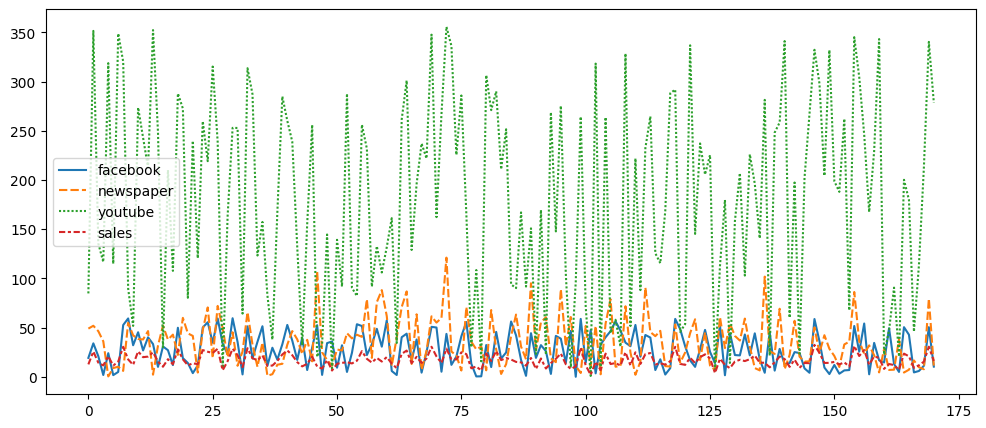

In [12]:
# Investimento ao longo do tempo
plt.figure(figsize = (12,5))
sns.lineplot(data = dat1[['facebook', 'newspaper', 'youtube', 'sales']])

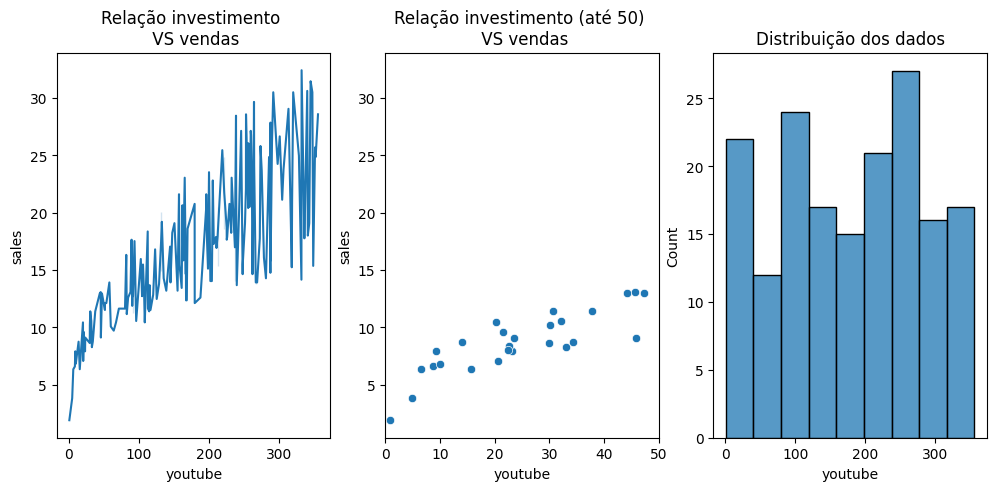

In [13]:
# Youtube
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.lineplot(data = dat1, x = 'youtube', y = 'sales', ax = axes[0]).set_title('Relação investimento \n VS vendas')
sns.scatterplot(data = dat1, x = 'youtube', y = 'sales', ax = axes[1]).set(xlim = (0,50), title = 'Relação investimento (até 50) \n VS vendas')
sns.histplot(data = dat1, x = 'youtube', ax = axes[2]).set_title('Distribuição dos dados')
plt.show()

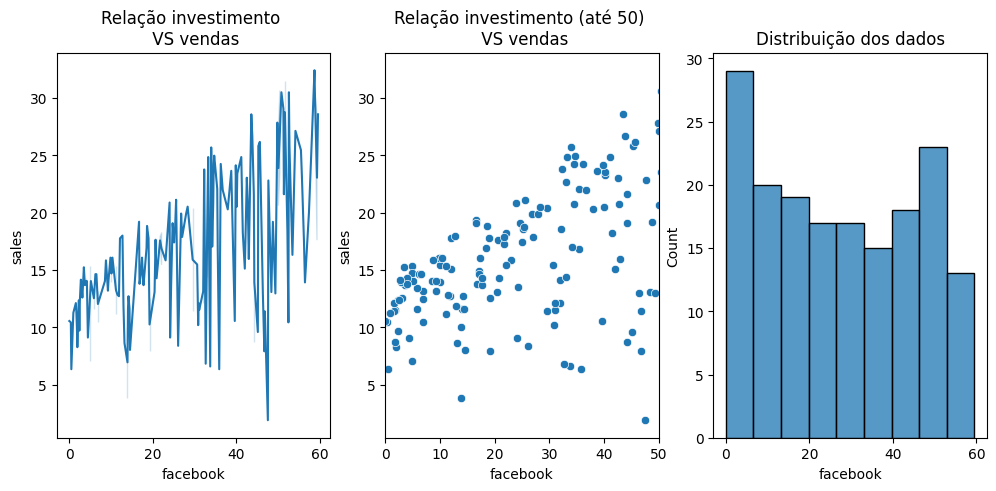

In [14]:
# Facebook
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.lineplot(data = dat1, x = 'facebook', y = 'sales', ax = axes[0]).set_title('Relação investimento \n VS vendas')
sns.scatterplot(data = dat1, x = 'facebook', y = 'sales', ax = axes[1]).set(xlim = (0,50), title = 'Relação investimento (até 50) \n VS vendas')
sns.histplot(data = dat1, x = 'facebook', ax = axes[2]).set_title('Distribuição dos dados')
plt.show()

In [ ]:
# Newspaper
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
sns.lineplot(data = dat1, x = 'newspaper', y = 'sales', ax = axes[0]).set_title('Relação investimento \n VS vendas')
sns.scatterplot(data = dat1, x = 'newspaper', y = 'sales', ax = axes[1]).set(xlim = (0,50), title = 'Relação investimento (até 50) \n VS vendas')
sns.histplot(data = dat1, x = 'newspaper', ax = axes[2]).set_title('Distribuição dos dados')
plt.show()

> A relação investimento VS retorno foi foi baixa, os valores com marketing são maiores que os de vendas.

## Teste de correlação

In [15]:
dat1[['sales', 'newspaper', 'youtube', 'facebook']].corr()

,sales,newspaper,youtube,facebook
sales,1.000000,0.254987,0.782030,0.602918
newspaper,0.254987,1.000000,0.110759,0.293425
youtube,0.782030,0.110759,1.000000,0.086538
facebook,0.602918,0.293425,0.086538,1.000000


> Tanto **Youtube** quanto **Facebook** apresentaram correlação positiva alta. Indicando maior possibilidade de aumento em **Sales** quando se aumenta o investimento nestas plataformas;

> Newspaper também apresentou correlação positiva, contudo, o valor foi baixo;

# Modelagem de Dados

## Identificando variáveis do modelo

In [16]:
print(sm.OLS(dat1[['sales']], 
       sm.add_constant(dat1[['facebook', 
                            'youtube',
                              'newspaper']])).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.09e-83
Time:                        23:00:52   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.0

> A variável **newspaper** não apresentou *p-value* significativo, ou seja, investir nela não afetará os valores de **sales**. Contudo, para fins didáticos já que o case não fala sobre a seleção de variáveis, iremos mantê-la.

In [18]:
# Criando bases de treino e teste
y = dat1['sales']

x = dat1[['facebook', 'youtube', 'newspaper']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(119, 3)
(119,)
(52, 3)
(52,)


In [20]:
lm = LinearRegression()

In [21]:
lm.fit(x_train, y_train)

LinearRegression()

In [23]:
y_predito = lm.predict(x_test)

In [24]:
print(f'Resultado do modelo: R² = {r2_score(y_test, y_predito):.2f}')

Resultado do modelo: R² = 0.88


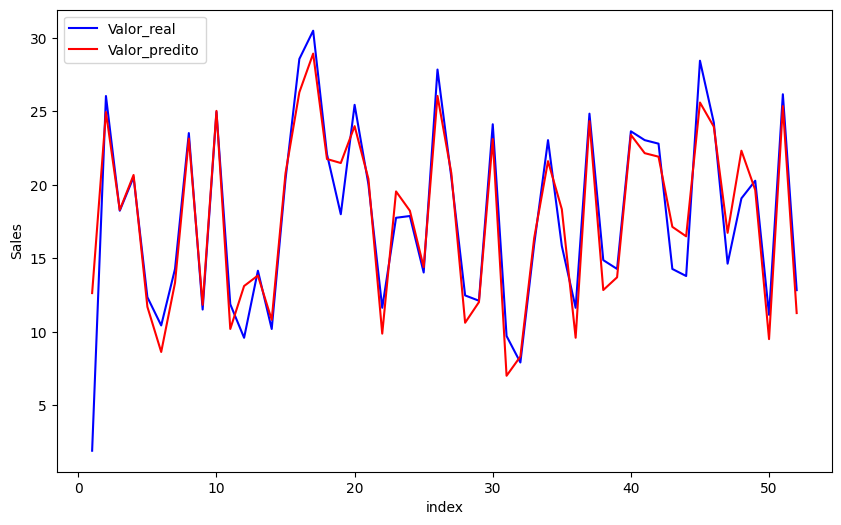

In [26]:
c = [i for i in range (1, 53, 1)]
fig = plt.figure(figsize = (10,6))
plt.plot(c, y_test, color = 'blue')
plt.plot(c, y_predito, color = 'red')
plt.xlabel("index")
plt.ylabel("Sales")
plt.legend(labels = ['Valor_real', 'Valor_predito']);

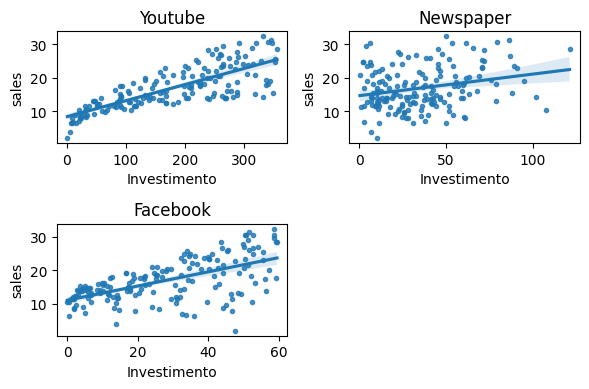

In [27]:
# Configurar subplots com espaçamento
fig, axs = plt.subplots(2, 2, figsize=(6, 4), tight_layout=True)

# Gráfico 1
axs[0, 0].set_title("Youtube")
sns.regplot(data=dat1, x=dat1["youtube"], y=dat1["sales"], marker=".", fit_reg=True, ax=axs[0, 0])
axs[0, 0].set_xlabel("Investimento")

# Gráfico 2
axs[0, 1].set_title("Newspaper")
sns.regplot(data=dat1, x=dat1["newspaper"], y=dat1["sales"], marker=".", fit_reg=True, ax=axs[0, 1])
axs[0, 1].set_xlabel("Investimento")

# Gráfico 3
axs[1, 0].set_title("Facebook")
sns.regplot(data=dat1, x=dat1["facebook"], y=dat1["sales"], marker=".", fit_reg=True, ax=axs[1, 0])
axs[1, 0].set_xlabel("Investimento")

# Remova o subplot não utilizado
fig.delaxes(axs[1, 1])

# Exibir os gráficos
plt.show()